https://gis.stackexchange.com/questions/62343/convert-an-ascii-grid-file-to-geotiff-using-python



In [1]:
 !ls

00-asc-to-gtiff-using-gdal.ipynb  ETo_data_in_ascii_why.ipynb
ETo.asc				  sane_numpy_ETo.npy
ETo.asc.gz.1


In [7]:
! gdal_translate -of "GTiff" ETo.asc converted_ETo.tif

#gdal_translate -of "GTiff" fname.asc outname.tif

Input file size is 510, 560
0...10...20...30...40...50...60...70...80...90...100 - done.


In [8]:
from osgeo import gdal, osr
in_filename = 'ETo.asc'
out_filename = 'python_converted_ETo.tif'

drv = gdal.GetDriverByName('GTiff')
ds_in = gdal.Open(in_filename)
ds_out = drv.CreateCopy(out_filename, ds_in)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
ds_out.SetProjection(srs.ExportToWkt())
ds_in = None
ds_out = None

In [9]:
! ls -lh *.tif

-rw-r--r-- 1 jupyter-butzer jupyter-butzer 1.1M Mar 16 23:33 converted_ETo.tif
-rw-r--r-- 1 jupyter-butzer jupyter-butzer 1.1M Mar 16 23:33 python_converted_ETo.tif


In [18]:
import numpy as np
from matplotlib import pyplot
import rasterio
def display_tif(filename):
    tif_file = filename
    with rasterio.open(tif_file) as src:
        myThumb = src.read(1)

    print(myThumb.shape)
    myThumb[(myThumb == -9999)] = np.nan
    pyplot.imshow(myThumb, cmap='magma')

    pyplot.show()


(560, 510)


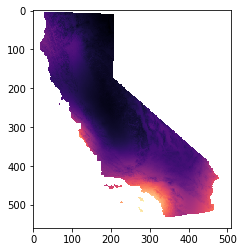

In [19]:
display_tif('converted_ETo.tif')

(560, 510)


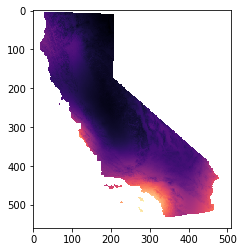

In [20]:
display_tif('python_converted_ETo.tif')